<ipython-input-67-f0c934684014>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_10['marca_destaque'] = df_top_10['Make'] == marca_destaque


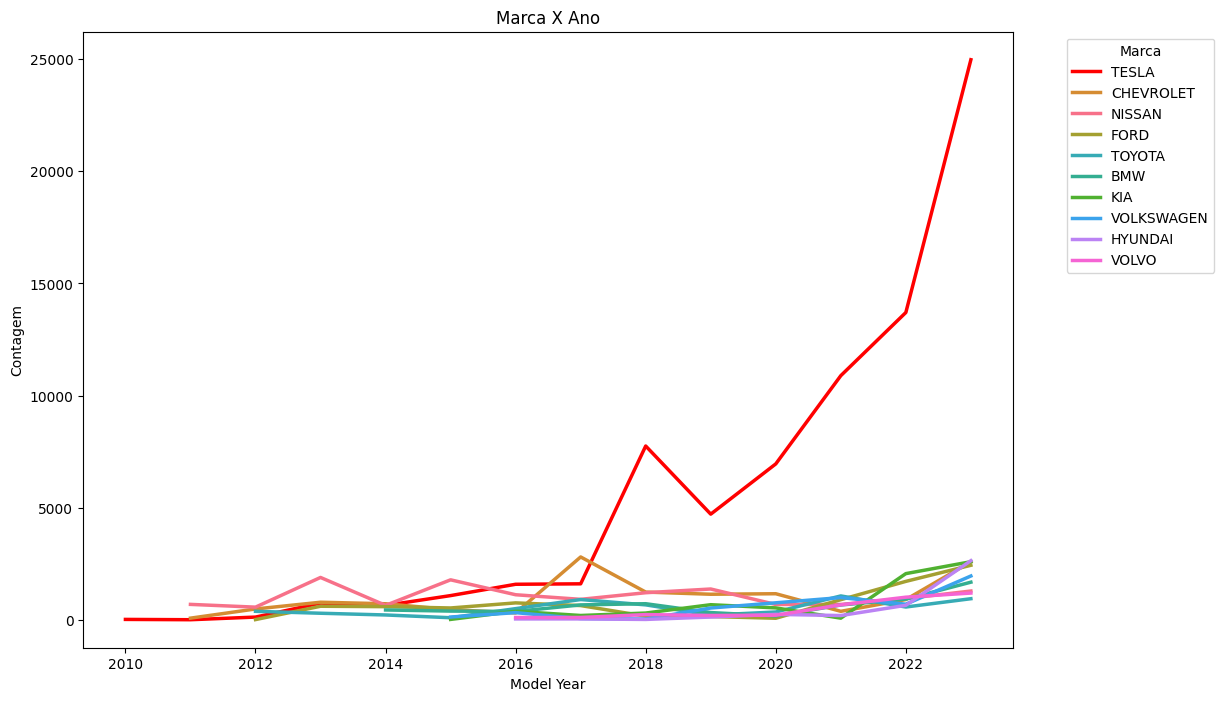

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Ler o arquivo CSV
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Filtro para incluir apenas registros a partir de 2010
df = df[(df['Model Year'] >= 2010) & (df['Model Year'] < 2024)]

# Contagem de ocorrências de cada marca
contagem_marcas = df['Make'].value_counts()

# Seleção das 10 maiores marcas
top_10_marcas = contagem_marcas.head(10)

# Filtrar o DataFrame para incluir apenas as 10 maiores marcas
df_top_10 = df[df['Make'].isin(top_10_marcas.index)]

# Definir a cor e a espessura da linha para uma marca específica
marca_destaque = 'TESLA'
cor_destaque = 'red'
espessura_destaque = 2.5

# Criar uma coluna indicando se a linha pertence à marca de destaque
df_top_10['marca_destaque'] = df_top_10['Make'] == marca_destaque

# Construir o dicionário para o parâmetro palette
cores = {marca_destaque: cor_destaque}

# Adicionar cores aleatórias para as outras marcas
outras_marcas = [marca for marca in top_10_marcas.index if marca != marca_destaque]
cores.update({marca: sns.color_palette("husl", n_colors=len(outras_marcas))[i] for i, marca in enumerate(outras_marcas)})

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 8))
sns.lineplot(x='Model Year', y='contagem', hue='Make',
             data=df_top_10.groupby(['Model Year', 'Make']).size().reset_index(name='contagem'),
             palette=cores,
             linewidth=espessura_destaque)
plt.title('Marca X Ano')
plt.ylabel('Contagem')
plt.legend(title='Marca', bbox_to_anchor=(1.05, 1), loc='upper left')

# Salvar o gráfico
plt.savefig('grafico_marcas_carros.png', bbox_inches='tight')

# Exibir o gráfico
plt.show()




